In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Define API key (d5799m255os5)
API_KEY = 'd5799m255os5'

# define the base URL 
region_code = 'US-FL'  # Ex: birds in FL
BASE_URL = f'https://api.ebird.org/v2/data/obs/{region_code}/recent/notable?detail=full'

# request to the eBird API (as they demo on the webpage)
headers = {
    'X-eBirdApiToken': 'd5799m255os5'
}

Notable Bird Observations:
                 comName                     sciName             obsDt  \
0  Red-headed Woodpecker  Melanerpes erythrocephalus  2024-10-22 18:01   
1  Red-headed Woodpecker  Melanerpes erythrocephalus  2024-10-22 18:01   
2  Red-headed Woodpecker  Melanerpes erythrocephalus  2024-10-22 18:01   
3  Red-headed Woodpecker  Melanerpes erythrocephalus  2024-10-22 18:01   
4  Red-headed Woodpecker  Melanerpes erythrocephalus  2024-10-22 18:01   

   howMany          locName        lat        lng    userDisplayName  
0      2.0  Alderman’s Acre  27.862484 -82.168504  Anonymous eBirder  
1      2.0  Alderman’s Acre  27.862484 -82.168504  Anonymous eBirder  
2      2.0  Alderman’s Acre  27.862484 -82.168504  Anonymous eBirder  
3      2.0  Alderman’s Acre  27.862484 -82.168504  Anonymous eBirder  
4      2.0  Alderman’s Acre  27.862484 -82.168504  Anonymous eBirder  

Total Number of Notable Birds Observed per Species:
comName
Common Tern                          2345

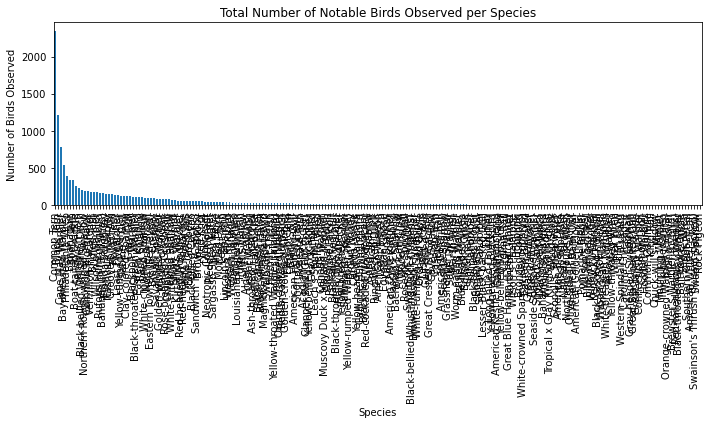

In [31]:
# GET request to the API
response = requests.get(BASE_URL, headers=headers)

# Check if the request
if response.status_code == 200:
    # Load the data into a pandas DataFrame
    data = response.json()
    df = pd.DataFrame(data)

    # specific columns
    bird_data = df[['comName', 'sciName', 'obsDt', 'howMany', 'locName', 'lat', 'lng', 'userDisplayName']]

    # the first few rows of the bird data
    print("Notable Bird Observations:")
    print(bird_data.head())

    # observation per species
    species_counts = bird_data.groupby('comName')['howMany'].sum().sort_values(ascending=False)

    # print
    print("\nTotal Number of Notable Birds Observed per Species:")
    print(species_counts)

    # display
    plt.figure(figsize=(10, 6))
    species_counts.plot(kind='bar', title='Total Number of Notable Birds Observed per Species')
    plt.xlabel('Species')
    plt.ylabel('Number of Birds Observed')
    plt.tight_layout()
    plt.show()

else:
    print(f"Error: {response.status_code} - {response.reason}")

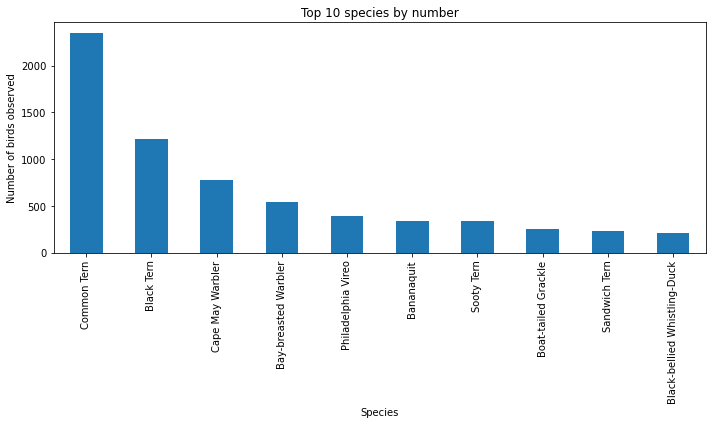

In [33]:
# more data analysis
# get the top 10 species by number 
top_species = species_counts.head(10)

# plot
plt.figure(figsize=(10, 6))
top_species.plot(kind='bar', title='Top 10 species by number')
plt.xlabel('Species')
plt.ylabel('Number of birds observed')
plt.tight_layout()
plt.show()